In [1]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import random as rd
import os

In [122]:
import sklearn
from sklearn.neural_network import MLPClassifier
from sklearn.neural_network import MLPRegressor

# Import splitting data into train and test
from sklearn.model_selection import train_test_split

## classification accuracy, ROC, AUC score of the model
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

##IPYthon display
from IPython.display import display

##Label Encoder for creating dummy variables
from sklearn.preprocessing import LabelEncoder

In [3]:
data_dir='E:/umesh/ResearchAndPublications/WIP/BA-2ndEdition-July2021/BOOK/Book Chapters/Chapter 10 - NeuralNetworks/Dataset/NN'
filename = "AttrData_NN.csv"
os.chdir(data_dir)
data_df = pd.read_csv(filename) 
print(data_df.shape)

(52, 6)


In [4]:
data_df.head(3)

,Attrition,YrsExp,WorkChallenging,WorkEnvir,Compensation,TechExper
0,Yes,2.5,No,Low,Low,Excellent
1,No,2.0,Yes,Excellent,Excellent,Excellent
2,No,2.5,Yes,Excellent,Low,Excellent


In [5]:
##Normalizing 'YerasOfExp' attribute data between 0 - 1
features = ['YrsExp']
data_df[features] = data_df[features]/data_df[features].max()

In [6]:
data_df.head()

,Attrition,YrsExp,WorkChallenging,WorkEnvir,Compensation,TechExper
0,Yes,0.5,No,Low,Low,Excellent
1,No,0.4,Yes,Excellent,Excellent,Excellent
2,No,0.5,Yes,Excellent,Low,Excellent
3,Yes,0.4,No,Excellent,Low,Excellent
4,No,0.4,Yes,Low,Low,Low


In [7]:
data_df.dtypes

Attrition           object
YrsExp             float64
WorkChallenging     object
WorkEnvir           object
Compensation        object
TechExper           object
dtype: object

In [8]:
data_df['Attrition'].value_counts()

Yes    28
No     24
Name: Attrition, dtype: int64

# Classification Using Neural Network

In [10]:
data_df_sub=data_df.select_dtypes(include=['object'])

for c in data_df_sub.columns:
   display(data_df_sub[c].value_counts())

Yes    28
No     24
Name: Attrition, dtype: int64

No     28
Yes    24
Name: WorkChallenging, dtype: int64

Excellent    28
Low          24
Name: WorkEnvir, dtype: int64

Low          31
Excellent    21
Name: Compensation, dtype: int64

Excellent    44
Low           8
Name: TechExper, dtype: int64

In [19]:
##Convert the categorical variables TEXT to numeric values as Neural Network does not understand text strings

In [18]:
X = data_df.copy()

In [19]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
cat_vars = ['Attrition', 'WorkChallenging','WorkEnvir','Compensation',
            'TechExper']
X[['Attrition','WorkChallenging',
   'WorkEnvir','Compensation',
   'TechExper']] = X[['Attrition','WorkChallenging',
    'WorkEnvir','Compensation','TechExper']].apply(LabelEncoder().fit_transform)

for var in cat_vars:
    X[var] = X[var].astype('category',copy=False)

X.head(3)

,Attrition,YrsExp,WorkChallenging,WorkEnvir,Compensation,TechExper
0,1,0.5,0,1,1,0
1,0,0.4,1,0,0,0
2,0,0.5,1,0,1,0


In [20]:
X.dtypes

Attrition          category
YrsExp              float64
WorkChallenging    category
WorkEnvir          category
Compensation       category
TechExper          category
dtype: object

In [21]:
X_sub=X.select_dtypes(include=['category'])

for c in X_sub.columns:
   display(X_sub[c].value_counts())

1    28
0    24
Name: Attrition, dtype: int64

0    28
1    24
Name: WorkChallenging, dtype: int64

0    28
1    24
Name: WorkEnvir, dtype: int64

1    31
0    21
Name: Compensation, dtype: int64

0    44
1     8
Name: TechExper, dtype: int64

In [22]:
##Data preparation
## For neural network, we have to input X and Y separately
##Y is the response class (target) and X is features Once this is done then split dataset 
# into train and test
y = X['Attrition']
X1 = X.drop(columns='Attrition')
X1.head(3)

#Split data into training and test datset

X_train, X_test, y_train, y_test = train_test_split(X1, y, test_size=0.20, random_state=40)
print(X_train.shape); print(X_test.shape);print(y_train.shape);print(y_test.shape)

(41, 5)
(11, 5)
(41,)
(11,)


In [44]:
#Generate Neural network Model with (7, 10, 2) hidden layers

In [111]:
from sklearn.neural_network import MLPClassifier

nn_model = MLPClassifier(hidden_layer_sizes=(5,2), activation='logistic',
                    solver='adam',shuffle=True,max_iter=1000)
nn_model.fit(X_train,y_train)

C:\Users\phdst\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPClassifier(activation='logistic', alpha=0.0001, batch_size='auto',
              beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(5, 2), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=1000,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [112]:
nn_model.hidden_layer_sizes

(5, 2)

In [113]:
nn_model.n_layers_

4

In [114]:
nn_model.classes_

array([0, 1], dtype=int64)

# Predict 'Attrition' using Neural Network model

In [115]:
#predict_train = NNCL.predict(X_train)
predict_test = nn_model.predict(X_test)

In [116]:
predict_test

array([1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1], dtype=int64)

In [117]:
## Find out the accuracy of the model

In [118]:
print(confusion_matrix(y_test,predict_test))
print(classification_report(y_test,predict_test))

[[5 1]
 [0 5]]
              precision    recall  f1-score   support

           0       1.00      0.83      0.91         6
           1       0.83      1.00      0.91         5

    accuracy                           0.91        11
   macro avg       0.92      0.92      0.91        11
weighted avg       0.92      0.91      0.91        11



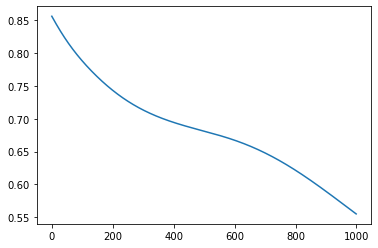

In [119]:
plt.plot(nn_model.loss_curve_)

In [120]:
nn_model.hidden_layer_sizes

(5, 2)

In [121]:
nn_model.coefs_

[array([[ 0.13038589,  0.37105089, -0.2412836 , -0.16881156, -0.48200271],
        [-1.64279412,  1.87100249, -1.11592665, -1.61885547, -1.2007269 ],
        [ 1.09244609, -1.10782601,  1.12467809,  0.70618752,  0.94465865],
        [ 0.58017621, -0.91420091,  0.70659265,  0.63411723,  0.84311529],
        [-1.04105164,  1.27404746, -1.27456171, -1.77544134, -1.01694948]]),
 array([[-0.90225391,  1.37706551],
        [ 0.89980021, -1.55736702],
        [-0.96883396,  1.24830141],
        [-0.72844235,  1.22966177],
        [-0.76597002,  0.80152607]]),
 array([[-0.85809687],
        [ 0.73184114]])]